In [2]:
from google.colab import files
uploaded = files.upload()

Saving IMDb Movies India.csv to IMDb Movies India.csv


In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("IMDb Movies India.csv", encoding='ISO-8859-1')
df.head()
df.shape
df.columns
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [8]:
df = df.dropna(subset=['Rating', 'Director'])
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})').astype(float)
df['Duration'] = df['Duration'].astype(str).str.replace('min', '').astype(float)
genre_dummies = df['Genre'].astype(str).str.get_dummies(sep=',')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Director_encoded'] = le.fit_transform(df['Director'].astype(str))
df_model = pd.concat([df[['Rating', 'Duration', 'Year', 'Director_encoded']], genre_dummies], axis=1)
df_model = df_model.dropna()

In [13]:
from sklearn.model_selection import train_test_split

X = df_model.drop('Rating', axis=1)
y = df_model['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 1.0019477903084513
RMSE: 1.270346780950513
R² Score: 0.14004438333676228


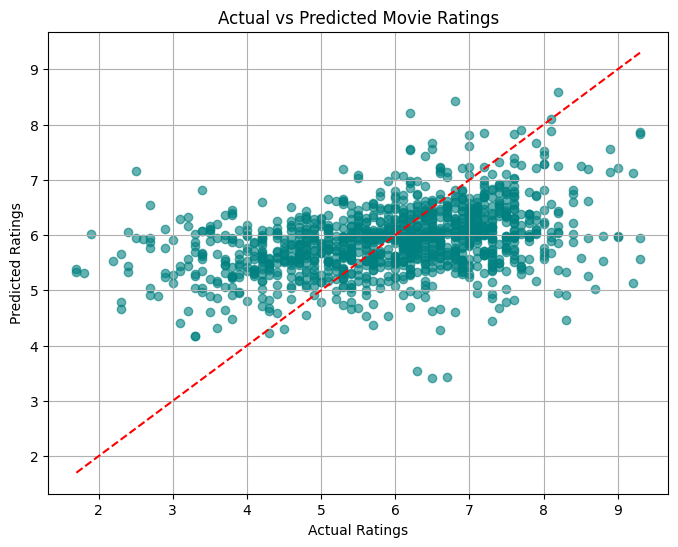

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()],  [y_test.min(), y_test.max()],'r--')
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()

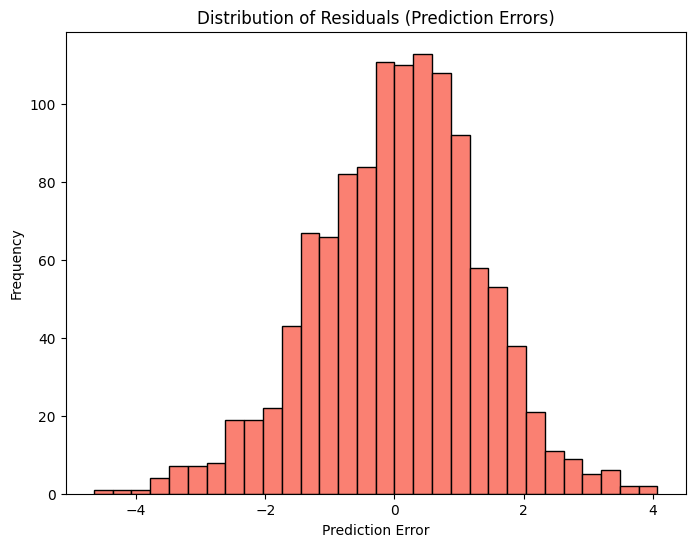

In [21]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='salmon', edgecolor='black')
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")

plt.show()